# Sentiment Analysis
Sentiment analysis using k-nearest neighbors classifier
* baseline model
* hyperparameter tuning
* tuned model

## Import and install required libraries

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, GridSearchCV

## Read dataset

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/train_aug.csv')

train_df.head()

,clean_text,manual_label
0,meebit bought eth usd blur meebits meebitsnft,pos
1,check tyler nft weekly preview analyzes market...,neu
2,meebits triple floor check opensea listing flo...,neu
3,clonex sold eth previously sold eth nft collec...,pos
4,mutant ape yacht club sold weth previously sol...,pos


In [ ]:
X_train, y_train = train_df['clean_text'], train_df['manual_label']

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/test.csv')

test_df.head()

,clean_text,manual_label
0,day mapo tofu healthy meal mean tofu got ta co...,neu
1,azuki room magicwin cryptochazman yasirali nft...,neu
2,nft lending agreement benddao ethereum reserve...,pos
3,meebit bought eth usd blur meebits meebitsnft,pos
4,sold punksticker new owner thanks enjoy nftcol...,pos


In [ ]:
X_test, y_test = test_df['clean_text'], test_df['manual_label']

In [ ]:
vectorizer = TfidfVectorizer(min_df = 1,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized=vectorizer.transform(X_test)

## Baseline knn model

In [ ]:
KNN_classifier = KNeighborsClassifier()

KNN_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
t0 = time.time()

KNN_classifier = KNeighborsClassifier().fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [ ]:
print("Training time: %fs" % (time_linear_train))

Training time: 0.006657s


In [ ]:
y_pred=KNN_classifier.predict(X_test_vectorized)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7325


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.24      0.43      0.31        21
         neu       0.60      0.56      0.58       102
         pos       0.85      0.82      0.83       277

    accuracy                           0.73       400
   macro avg       0.56      0.60      0.57       400
weighted avg       0.75      0.73      0.74       400



## Hyperparameter tuning

* n_neighbors
* weights
* metric

### n_neighbors

In [ ]:
param_grid = { 
    "n_neighbors": [5, 10, 20, 30, 40, 50]
    }
        
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
grid_search = GridSearchCV(estimator=KNN_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [ ]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.7857
The best hyperparameters are {'n_neighbors': 5}


### weights

In [ ]:
param_grid = { 
    "n_neighbors": [5],
    "weights" : ["uniform", "distance"]
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
grid_search = GridSearchCV(estimator=KNN_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

In [ ]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8154
The best hyperparameters are {'n_neighbors': 5, 'weights': 'distance'}


### metric

In [ ]:
param_grid = { 
    "n_neighbors": [5],
    "weights" : ["distance"],
    "metric": ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
    }

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
grid_search = GridSearchCV(estimator=KNN_classifier, 
                           param_grid=param_grid, 
                           scoring='f1_macro', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)

grid_result = grid_search.fit(X_train_vectorized,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_base.py", line 562, in _fit
    raise ValueError(
ValueError: Metric 'chebyshev' not valid for sparse input. Use sorted(skle

In [ ]:
print(f'The best score is {grid_result.best_score_:.4f}')

print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8154
The best hyperparameters are {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


## Tuned knn model

In [ ]:
t0 = time.time()

KNN_classifier_tuned = KNeighborsClassifier(
    metric = 'euclidean',
    n_neighbors = 5,
    weights = 'distance' 
    ).fit(X_train_vectorized,y_train)
t1 = time.time()

time_linear_train = t1-t0

In [ ]:
KNN_classifier_tuned.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

In [ ]:
print("Training time: %fs" % (time_linear_train))

Training time: 0.018776s


In [ ]:
y_pred=KNN_classifier_tuned.predict(X_test_vectorized)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7575


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.29      0.38      0.33        21
         neu       0.62      0.63      0.62       102
         pos       0.86      0.83      0.85       277

    accuracy                           0.76       400
   macro avg       0.59      0.61      0.60       400
weighted avg       0.77      0.76      0.76       400



## Apply on full dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cz4034 IR project/classifier/XGBoost/full_dataset_final.csv')

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k


In [ ]:
df.isnull().values.any()

False

In [ ]:
full_vectors = vectorizer.transform(df['clean_text'])

In [ ]:
full_prediction_linear = KNN_classifier_tuned.predict(full_vectors)

In [ ]:
df['knn'] = full_prediction_linear.tolist()

df.head()

,Datetime,Quarter,Likes,NFT,Text,clean_text,knn
0,2023-02-13,31,2,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#1800 ...,mutant ape yacht club mayc nft sold eth k,pos
1,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#8202 ...,mutant ape yacht club mayc nft sold eth k,pos
2,2023-02-13,31,0,Mutant Ape Yacht Club,11x Mutant Ape Yacht Club\nTotal cost: 170.130...,x mutant ape yacht club total cost average cos...,pos
3,2023-02-13,31,1,Mutant Ape Yacht Club,Public sale is Live! @cybotz_nft🚀\n\nTop 10 #N...,public sale live cybotz nft top nft sale last ...,pos
4,2023-02-13,31,3,Mutant Ape Yacht Club,🧪 Mutant Ape Yacht Club | #MAYC #NFT\n\n#4091 ...,mutant ape yacht club mayc nft sold eth k,pos


In [ ]:
total_counts = len(df.index)

total_counts

20295

In [ ]:
counts = df['knn'].value_counts()

counts

pos    14479
neu     4412
neg     1404
Name: knn, dtype: int64

<Axes: >

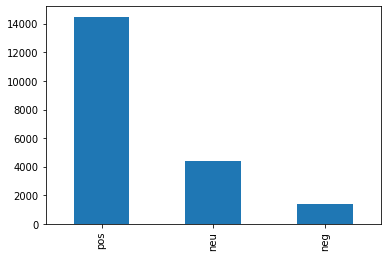

In [ ]:
df['knn'].value_counts().plot.bar()

In [ ]:
df.to_csv('knn_full_dataset.csv', index = False)